In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_robot/new2_lukas/single_traverse_damped_1.csv")
df_no = pd.read_csv("data_robot/new2_lukas/single_traverse_nodamping_1.csv")
df_nothing = pd.read_csv("data_robot/new2_lukas/single_traverse_no_interaction.csv")

In [3]:
df.head(2)

,Unnamed: 0,D,eigen_values_obs,pos,vel,des_vel,normals,dists
0,0,[[12.03835283 1.16778395 -0.12454555]\n [ 1.1...,[[42.48063397 0. 0. ]\n [ 0. ...,[0.38869096 0.45743382 0.17434233],[0.00410342 0.00177975 0.00214454],[-0.00635798 -0.19359044 0.02064665],[[0.62066308]\n [0.76593876]\n [0.16767576]],[8.07972576]
1,1,[[12.03846988 1.16956991 -0.12466718]\n [ 1.1...,[[50.66722155 0. 0. ]\n [ 0. ...,[0.38872579 0.45747533 0.17438789],[0.00150314 0.00243998 0.0025371 ],[-0.00636766 -0.19359104 0.02063532],[[0.62065661]\n [0.76592765]\n [0.1677504 ]],[8.08125209]


In [4]:
df_no.head(2)

,Unnamed: 0,D,eigen_values_obs,pos,vel,des_vel,normals,dists
0,0,[[12.04419018 1.25335331 -0.13416141]\n [ 1.2...,NaN,[0.39158104 0.45036709 0.17461747],[-1.53278396e-04 1.87185472e-05 -7.58954011e-04],[-0.00683701 -0.19391616 0.02075717],[[0.63147385]\n [0.75663982]\n [0.16951977]],[7.99162004]
1,1,[[12.04423824 1.25403557 -0.13421802]\n [ 1.2...,NaN,[0.39159711 0.45036549 0.17462742],[ 0.00488336 -0.00499156 0.00018536],[-0.00684075 -0.19391681 0.0207547 ],[[0.63149378]\n [0.7566193 ]\n [0.16953713]],[7.99188551]


In [5]:
def clean_matrix(Serie:pd.Series):
    clean = Serie.copy()
    for i in range(Serie.shape[0]):
        yy = Serie[i]
        yy = yy.replace("[", " ")
        yy = yy.replace("]", " ")
        yy = yy.replace("\n", " ")
        yy = np.array(yy.split()).astype(float)
        yy = yy.reshape(3,3)
        clean[i] = yy
    return clean

In [6]:
def clean_array(Serie:pd.Series):
    clean = Serie.copy()
    for i in range(Serie.shape[0]):
        yy = Serie[i]
        yy = yy.replace("[", " ")
        yy = yy.replace("]", " ")
        yy = yy.replace("\n", " ")
        yy = np.array(yy.split()).astype(float)
        clean[i] = yy
    return clean

In [7]:
def clean_float(Serie:pd.Series):
    clean = Serie.copy()
    for i in range(Serie.shape[0]):
        yy = Serie[i]
        yy = yy.replace("[", " ")
        yy = yy.replace("]", " ")
        yy = yy.replace("\n", " ")
        yy = float(yy)
        clean[i] = yy
    return clean

In [8]:
def clean_all(df):
    clean_D = clean_matrix(df["D"])
    #clean_eigen_values_obs = clean_matrix(df["eigen_values_obs"]).apply(np.diag)
    clean_pos = clean_array(df["pos"])
    clean_vel = clean_array(df["vel"])
    clean_des_vel = clean_array(df["des_vel"])
    clean_normal = clean_array(df["normals"])
    clean_dist = clean_float(df["dists"])
    df_clean = pd.concat(
        [clean_D, 
        #clean_eigen_values_obs,
        clean_vel,
        clean_des_vel,
        clean_pos,
        clean_normal,
        clean_dist], axis=1
    )
    return df_clean
    

In [9]:
df_clean_damp = clean_all(df)
df_clean_damp["force_norm"] = (df_clean_damp["D"]*(df_clean_damp["vel"] - df_clean_damp["des_vel"])).apply(np.linalg.norm)
df_clean_no_damp = clean_all(df_no)
df_clean_no_damp["force_norm"] = (df_clean_no_damp["D"]*(df_clean_no_damp["vel"] - df_clean_no_damp["des_vel"])).apply(np.linalg.norm)
df_clean_nothing = clean_all(df_nothing)
df_clean_nothing["force_norm"] = (df_clean_nothing["D"]*(df_clean_nothing["vel"] - df_clean_nothing["des_vel"])).apply(np.linalg.norm)



In [10]:
df_clean_no_damp

,D,vel,des_vel,pos,normals,dists,force_norm
0,"[[12.04419018, 1.25335331, -0.13416141], [1.25...","[-0.000153278396, 1.87185472e-05, -0.000758954...","[-0.00683701, -0.19391616, 0.02075717]","[0.39158104, 0.45036709, 0.17461747]","[0.63147385, 0.75663982, 0.16951977]",7.99162,9.258552
1,"[[12.04423824, 1.25403557, -0.13421802], [1.25...","[0.00488336, -0.00499156, 0.00018536]","[-0.00684075, -0.19391681, 0.0207547]","[0.39159711, 0.45036549, 0.17462742]","[0.63149378, 0.7566193, 0.16953713]",7.991886,9.020017
2,"[[13.29926529, 6.57380018, -1.3677029], [6.573...","[0.01573842, -0.02711768, -0.00478226]","[-0.03104955, -0.15709918, 0.03268505]","[0.39175378, 0.45012348, 0.1745906]","[0.05716716, 0.99829307, 0.01195241]",4.571375,6.079412
3,"[[14.26375722, 8.64269465, -1.29402186], [8.64...","[0.02054834, -0.04219396, -0.0098999]","[-0.04150443, -0.15845786, 0.023725]","[0.39194622, 0.44972712, 0.17450032]","[0.05369419, 0.99846627, -0.01349212]",4.421502,5.477080
4,"[[14.1121241, 8.37324043, -1.21005951], [8.373...","[0.02256433, -0.04798256, -0.00695959]","[-0.04045259, -0.160369, 0.02317574]","[0.39217448, 0.44922722, 0.17440496]","[0.05357863, 0.99847658, -0.01318501]",4.4281,5.312134
...,...,...,...,...,...,...,...
2344,"[[12.01239543, -0.58037922, 0.33051758], [-0.5...","[-0.26769452, -0.34403116, -0.36798895]","[0.00463895, -0.21720498, 0.1236951]","[0.46807939, -0.06709296, 0.18089294]","[0.99793296, -0.06410432, 0.0045211]",-0.822863,14.210030
2345,"[[12.04488562, -1.08831707, 0.65531194], [-1.0...","[-0.13562273, -0.34710967, -0.26679547]","[0.00882759, -0.21403784, 0.12887931]","[0.46721342, -0.0692039, 0.17921319]","[0.99787225, -0.06512964, -0.00301697]",-0.824343,12.085629
2346,"[[12.23412452, 2.7209428, -0.98495612], [2.720...","[0.12894633, -0.29452109, -0.02673799]","[-0.02016101, -0.23430671, 0.08481686]","[0.46799919, -0.07198107, 0.17847207]","[0.99607213, -0.08826355, -0.00706139]",-0.821054,3.975077
2347,"[[12.04322013, 1.12906262, -0.52846394], [1.12...","[0.30772189, -0.30035893, 0.19409974]","[-0.00866227, -0.22628917, 0.10591589]","[0.47098151, -0.07482231, 0.17990772]","[0.99583543, -0.09096874, 0.00604046]",-0.815625,5.413664


Text(0.5, 1.0, 'Force')

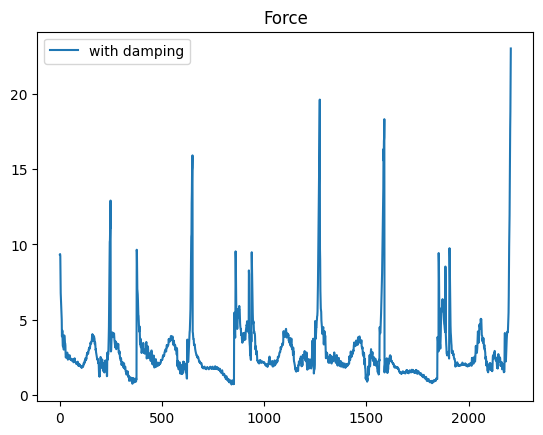

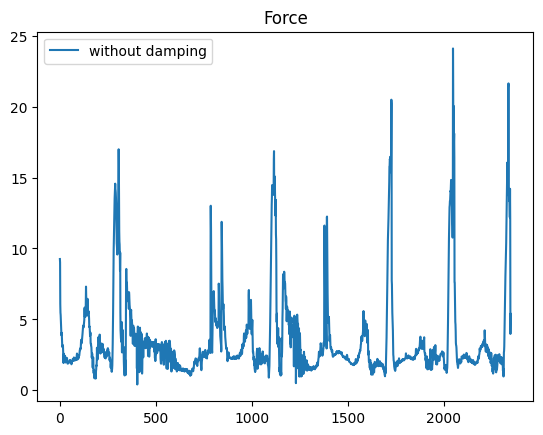

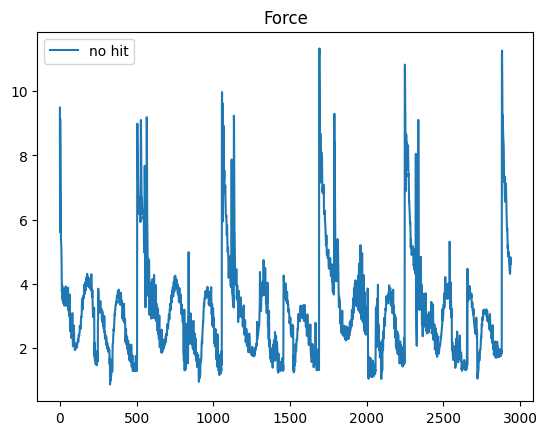

In [33]:
fig = df_clean_damp.plot(y = "force_norm", use_index=True, label = "with damping")
plt.title("Force")
df_clean_no_damp.plot(y = "force_norm", use_index=True, label = "without damping")
plt.title("Force")
df_clean_nothing.plot(y = "force_norm", use_index=True, label = "no hit")
plt.title("Force")

Text(0.5, 1.0, 'Damped (Ours)')

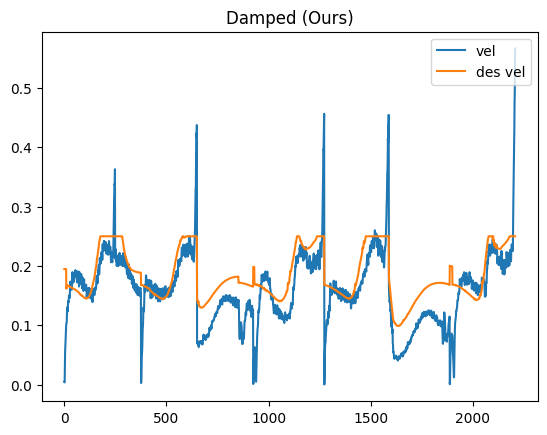

In [34]:
plt.plot(df_clean_damp["vel"].apply(np.linalg.norm), label = "vel")
plt.plot(df_clean_damp["des_vel"].apply(np.linalg.norm), label = "des vel")
plt.legend(loc = "upper right")
plt.title("Damped (Ours)")

Text(0.5, 1.0, 'Not Damped (Kronander)')

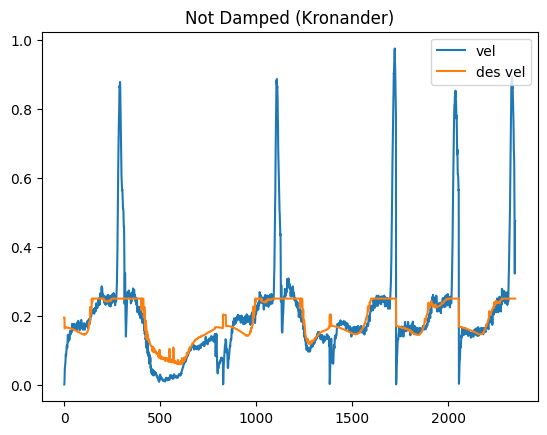

In [35]:
plt.plot(df_clean_no_damp["vel"].apply(np.linalg.norm), label = "vel")
plt.plot(df_clean_no_damp["des_vel"].apply(np.linalg.norm), label = "des vel")
plt.legend(loc = "upper right")
plt.title("Not Damped (Kronander)")

In [14]:
df_clean_damp

,D,vel,des_vel,pos,normals,dists,force_norm
0,"[[12.03835283, 1.16778395, -0.12454555], [1.16...","[0.00410342, 0.00177975, 0.00214454]","[-0.00635798, -0.19359044, 0.02064665]","[0.38869096, 0.45743382, 0.17434233]","[0.62066308, 0.76593876, 0.16767576]",8.079726,9.327491
1,"[[12.03846988, 1.16956991, -0.12466718], [1.16...","[0.00150314, 0.00243998, 0.0025371]","[-0.00636766, -0.19359104, 0.02063532]","[0.38872579, 0.45747533, 0.17438789]","[0.62065661, 0.76592765, 0.1677504]",8.081252,9.358550
2,"[[12.03852727, 1.17044409, -0.12473178], [1.17...","[0.00468485164, -9.59401053e-05, 0.00347053744]","[-0.00637242, -0.19359184, 0.02063068]","[0.38874476, 0.45748079, 0.17440809]","[0.62067131, 0.76590789, 0.16778623]",8.081736,9.237803
3,"[[12.03878634, 1.17436609, -0.12517215], [1.17...","[0.01248087, -0.0288347, -0.00230753]","[-0.00639418, -0.19360183, 0.02063544]","[0.38887111, 0.45726083, 0.17439941]","[0.62105829, 0.76559105, 0.16780031]",8.07945,7.872037
4,"[[12.0389829, 1.17731851, -0.12564186], [1.177...","[0.01288162, -0.05200061, -0.00917705]","[-0.00641109, -0.19362063, 0.02066294]","[0.38901291, 0.45675179, 0.17432616]","[0.62177024, 0.76502251, 0.16775674]",8.071606,6.773453
...,...,...,...,...,...,...,...
2203,"[[44.38021058, 4.5479284, 21.49999983], [4.547...","[-0.29163509, -0.19984082, -0.25185789]","[-0.0733903, -0.23637603, 0.03521697]","[0.61929017, 0.05705912, 0.32087661]","[0.80266982, -0.05203925, 0.59414904]",0.518421,15.421585
2204,"[[44.56851643, 4.72811193, 21.38711485], [4.72...","[-0.32729429, -0.19700453, -0.28169986]","[-0.07055548, -0.23663856, 0.03903991]","[0.61607842, 0.05507134, 0.31808589]","[0.80434215, -0.0521046, 0.59187736]",0.416116,17.695627
2205,"[[44.76263351, 4.93948837, 21.26120617], [4.93...","[-0.34222287, -0.19344944, -0.29391108]","[-0.06738689, -0.23681818, 0.04331463]","[0.61271109, 0.05314049, 0.31519327]","[0.8059229, -0.05220911, 0.5897139]",0.308864,18.813188
2206,"[[44.99813076, 5.22455711, 21.09683516], [5.22...","[-0.36440029, -0.19754758, -0.31910717]","[-0.06323555, -0.23688773, 0.04884127]","[0.60871549, 0.0509697, 0.31167117]","[0.80766564, -0.05241054, 0.58730687]",0.179488,20.581302


In [15]:
df_clean_damp["D"].apply(np.linalg.eig)[0]

(array([48., 12., 12.]),
 array([[-0.0326398 ,  0.82504756,  0.56411982],
        [-0.99383101,  0.03306487, -0.10586143],
        [ 0.10599326,  0.56409507, -0.81887862]]))

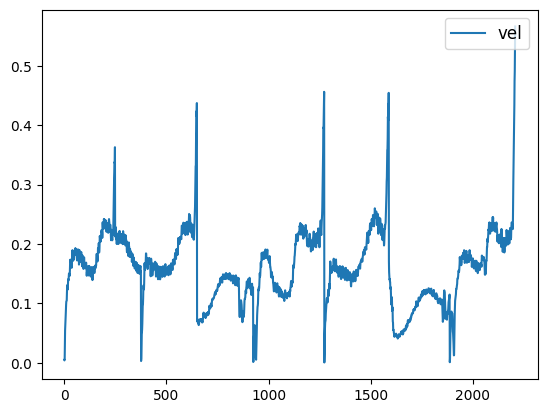

In [31]:
plt.plot(df_clean_damp["vel"].apply(np.linalg.norm), label = "vel")
plt.legend(loc = 1, prop={'size': 12})

In [23]:
ex = np.array([1,2,3,4])
np.save("test_save.npy", ex)

In [24]:
ex_rec = np.load("test_save.npy")
ex_rec

array([1, 2, 3, 4])